## 도형그리기
- 각 함수들은 원본 이미지에 도형을 그린다.
- cv2.line(img, pt1, pt2, color, tickness=None, lineType=None, shift):img
    - 선그리기
    - 매개변수
        - img: 그릴 대상 이미지
        - pt1, pt2: 직선의 시작/끝점. 각각 튜플(x, y)
        - color: 선색 또는 밝기 (B,G,R) 튜플 또는 정수
        - thickness: 선 두께. 기본값=1 (픽셀)
        - lineType: 선 타입. cv2.LINE_4, cv2.LINE_8(기본값), cv2.LINE_AA(부드러운 형태) 중 선택. 일직선이 아니면 LINE_AA를 준다.
    - 반환값
       - 선을 그린 image (ndarray) 반환 (모든 도형함수 동일)

- cv2.rectangle(img, pt1, pt2, color, thickness=None, lineType=None):img
- cv2.rectangle(img, rec, color, thickness=None, lineType=None):img
    - 사각형 그리기
    - 매개변수
        - pt1, pt2: 좌측상단, 우측하단 좌표. 튜플 (x, y)
        - rec: 사각형의 위치정보(x, y, w, h) 튜플지정.
        - thickness: 도형에서는 -1을 주면 내부를 채운다. 


- cv2.circle(img, center, radius, color, thickness=None, lineStyle=None): img
    - 원 그리기. 원의 lineType은 LINE_AA (안티 알리애싱)을 주면 부드럽게 그려진다. 
    - 매개변수
        - center: 원의 중심좌표. 튜플 (x,y)
        - radius: 반지름

- CV2.polylines(img, pts, isClosed, color, thinkness=None, lineType=None): img
    - 다각형을 그린다.
    - 매개변수
        - pts: 다각형의 외곽점들의 좌표배열. ndarray 리스트 (ex: \[np.array[[10,10],[50,50], [10,10]])\] => 리스트로 감싸서 넣는다.
        - isClosed: bool. 폐곡선 여부. 시작점과 끝점을 연결할지 여부.

- cv2.putText(img, text, org, fontFace, fontScale, color, thickness=None, lineType=None): img
    - 문자열을 출력. 영문/숫자만 지원(한글 지원안함.)
    - 매개변수
        - text: 출력할 문자열
        - org: 이미지에서 문자열을 출력할 위치. 좌측 하단의 좌표를 튜플로 지정 (x,y)
        - fontFace: 폰트 종류. cv2.FONT_HERSHEY_ 로 시작하는 상수 중 선택
        - fontScale: 폰트 크기 확대/축소 비율. 1이 기본. 1을 기준으로 정한다.

In [3]:
import cv2
import numpy as np

img = np.full((400, 400, 3), fill_value=255, dtype='uint8')
# 선
# 대상이미지: 시작점의 좌표, 끝점의 좌표 ((X좌표), (y좌표), (색상), 선굵기)
cv2. line(img, (50, 50), (200, 50), (0, 0, 255), 2)
# 계단현상 X (lineType=cv2.LINE_AA)
cv2. line(img, (50, 50), (150, 160), (255, 0, 0), 3, lineType=cv2.LINE_AA)

# 사각형
# 좌상단좌표, 우하단 좌표, 색상, 선굵기
cv2.rectangle(img, (70, 220), (180, 280), (0, 255, 0), 2) 
# 좌상단좌표X, 좌상단좌표y, width, height    => 선 굵기는 -1 => 채우기
cv2.rectangle(img,(70, 281, 70, 30), (0, 0, 128), -1)

# 원 (circle)
# 중심점좌표, 반지름, 색, 두께
cv2.circle(img, (300, 100), 30, (255, 255, 0), -1)
cv2.circle(img, (300, 100), 60, (255, 0, 255), 1, lineType=cv2.LINE_AA)

# 다각형 - 꼭지ㄷ점들의 좌표를 순서대로 나열 
pts= np.array([[250,200],[300,200],[350,300],[250,300]])
cv2.polylines(img,[pts],False,(255,0,255),2) # 연결할 점들의 좌표, , 폐곡점 여부(시작점,끝날점)

# text 출력
cv2.putText(img, "Hello world",
           (50,300), # 텍스트 시작 점, (baseline, 좌하단 시작점.
            cv2.FONT_HERSHEY_COMPLEX,  # 폰트
            1, # 글씨 크기
            (255,0,0), 1, cv2.LINE_AA # 색, 선(글씨의)두개, 라인타입
           )           
cv2.imshow('frame', img)
cv2.waitKey()
cv2.destroyAllWindows()


### Lenna Image에 텍스트 그리기
Lenna Forsen

In [12]:
txt= "Lenna Foresen"
leena = cv2.imread('images/lenna.bmp')
cv2.rectangle(leena,(200,200), (370,400),(0,0,0),2)
cv2.putText(leena, txt,(160, 440), cv2.FONT_HERSHEY_COMPLEX, 1,  (255,255,255), 2, cv2.LINE_AA)
cv2.imshow('frame',leena)


cv2.waitKey()
cv2.destroyAllWindows()

## 이미지 Crop
- open cv는 이미지를 numpy의 ndarray를 이용해 연산하기 때문에 image의 특정 영역의 좌표만 알면 그 영역을 잘라낼 수 있다.

In [13]:
type(leena), leena.shape

(numpy.ndarray, (512, 512, 3))

In [18]:
leena_face= leena[200:400,200:370,2] # x,y 로 슬라이싱
                                           
cv2.imshow('f',leena_face)
cv2.waitKey()
cv2.destroyAllWindows()

## 영상의 기하학적 변환
- 영상을 구성하는 픽셀의 배치 구조를 변경함으로써 전체 영상의 모양을 바꾸는 작업

### 이동 변환 (Translation Transformation)
- 가로 또는 세로 방향으로 영상을 이동시키는 변환
- X축과 Y축 방향으로 이동 변위를 지정
- 그림을 가로(X축) 으로 a 만큼 , 세로(Y축)으로 b만큼 이동할 경우
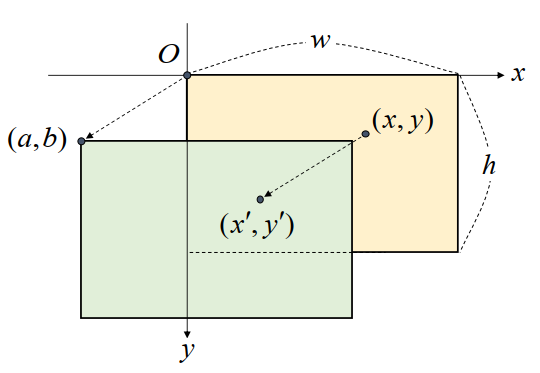

$$
\,각\,좌표들을 (a,b)\,만큼\,더한다.
\large{
    \begin{cases}
    x'=x+a\\
    y'= y+b
    \end{cases}
}
$$

<hr>
$$
행렬곱으로\,표현\\
\large{
    \begin{bmatrix}
    x'\\
    y'
    \end{bmatrix}=
    \begin{bmatrix}
    1 & 0 & a \\
    0 & 1 & b
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
    x\\y\\1
    \end{bmatrix}
}\\
이동을 위한 2\times3\,어파인\,변환\,행렬 \\
\begin{bmatrix}
1 & 0 & a \\
0 & 1 & b
\end{bmatrix}
$$



- cv2.warpAffine(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None)
    - 매개변수
        - src: 원본 영상
        - M: $2\times3$ 어파인 변환 행렬. 실수형
        - dsize: 결과 영상의 크기를 (w, h) 튜플로 지정. (0,0) 이면 같은 크기
        - flags: 보간법
        - borderMode: 영상이 이동해서 생기는 빈공간을 채우는 방식. default: cv2.BORDER_CONSTANT (검정색으로 채운다.)
            - borderValue: cv2.BORDER_CONSTANT 일때 채울 색. (B, G, R) 로 지정

In [33]:
img= cv2.imread('images/lenna.bmp')
# 좌우로 이동
a= 100# 오른쪽으로 30이동
b= 100 # 아래쪽으로 70 픽셀 이동 
aff_maxtrix_1 = np.array([[1,0,a],[0,1,b]],dtype='float32')

result= cv2.warpAffine(img, # 대상이미지 
                       aff_maxtrix_1, # affine - 변환행렬- 새로운 좌표를계산할때 사용할 행렬
                       (612,612), # dsize -> 출력이미지의 size , (0,0) : 대상 이미지와 동일한 size
                       borderMode= cv2.BORDER_CONSTANT, # 이동후 남은 빈공간을 채우는 방식
                       borderValue=(255,255,255)
                      )

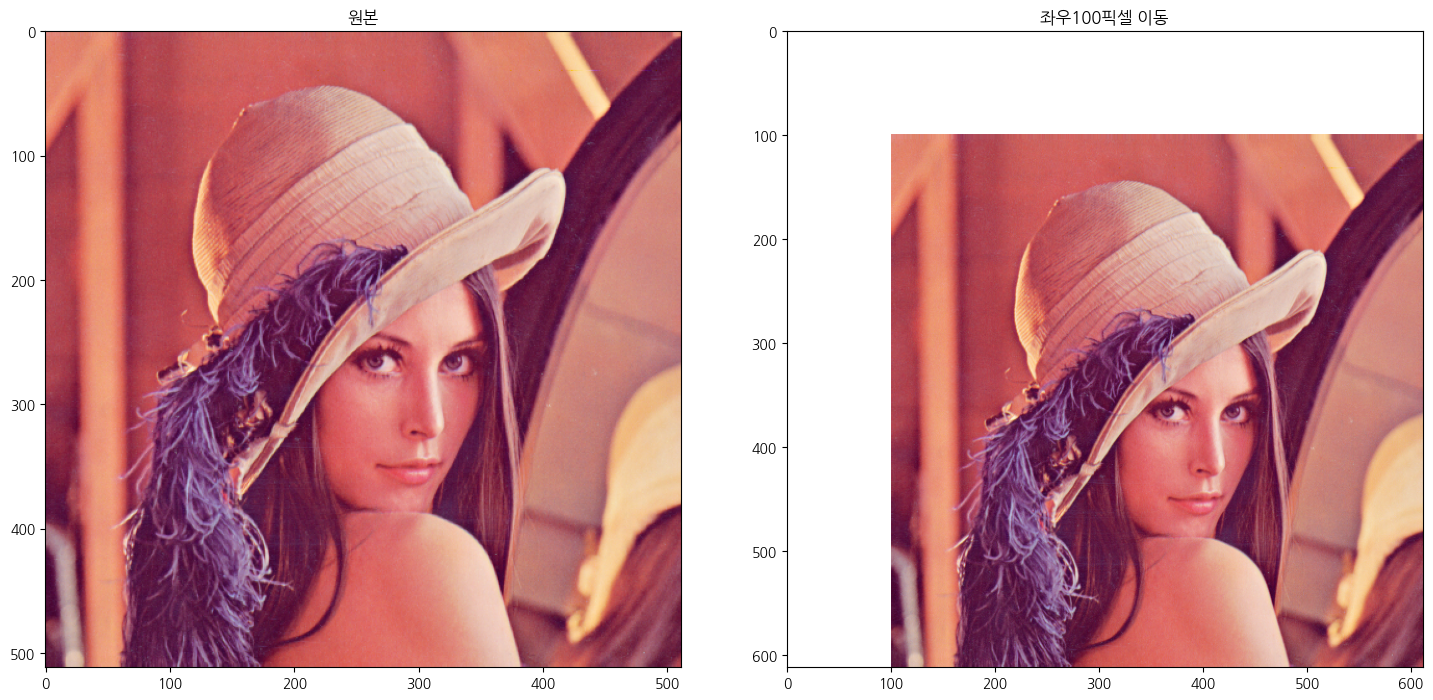

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.title('원본')

plt.subplot(1,2,2)
plt.imshow(result[:,:,::-1])
plt.title(f'좌우{a}픽셀 이동')
plt.tight_layout()
plt.show()


In [35]:
cv2.imshow('result',result)
cv2.waitKey()
cv2.destroyAllWindows()

### 전단 변환(Shear transformation)
- 직사각형 형태의 영상을 한쪽 방향으로 밀어서 평행사변형 모양으로 변형되는 변환으로 층밀림 변환이라고도 한다.
    - 한축 방향으로 이동하는데 기준축에 비례해서 다르게 이동한다.
- X축과 Y축에 대해 따로 정의 한다.
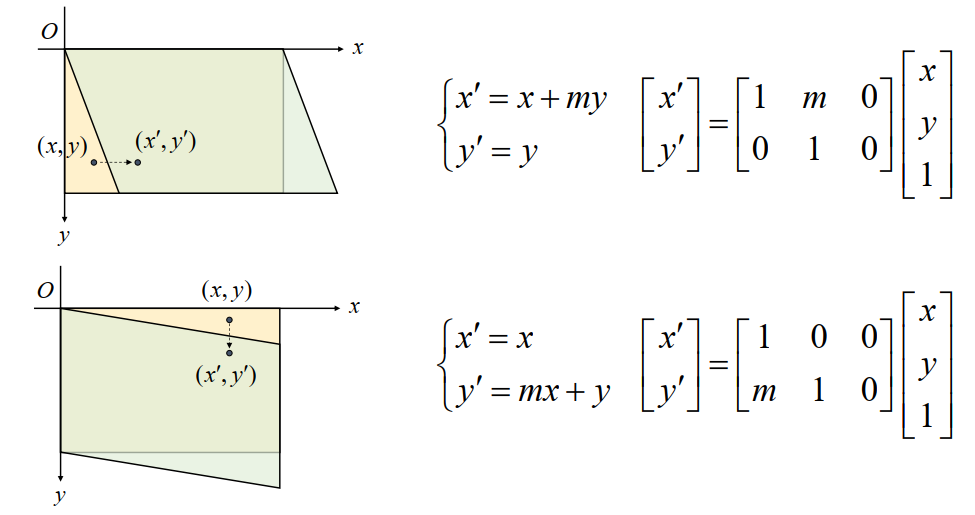
<center>m: 비율</center>

In [40]:
x_rate= 0.1
y_rate=0.3

aff_matrix_2 =np.array([[1, x_rate,0],# x축 (좌,우)
                        [y_rate,1,0]  ]) # y축 (상,하)

width= int(img.shape[1]+img.shape[0]*x_rate)
height=int(img.shape[0]+img.shape[1]*y_rate)
result2= cv2.warpAffine(img, aff_matrix_2,(width,height))

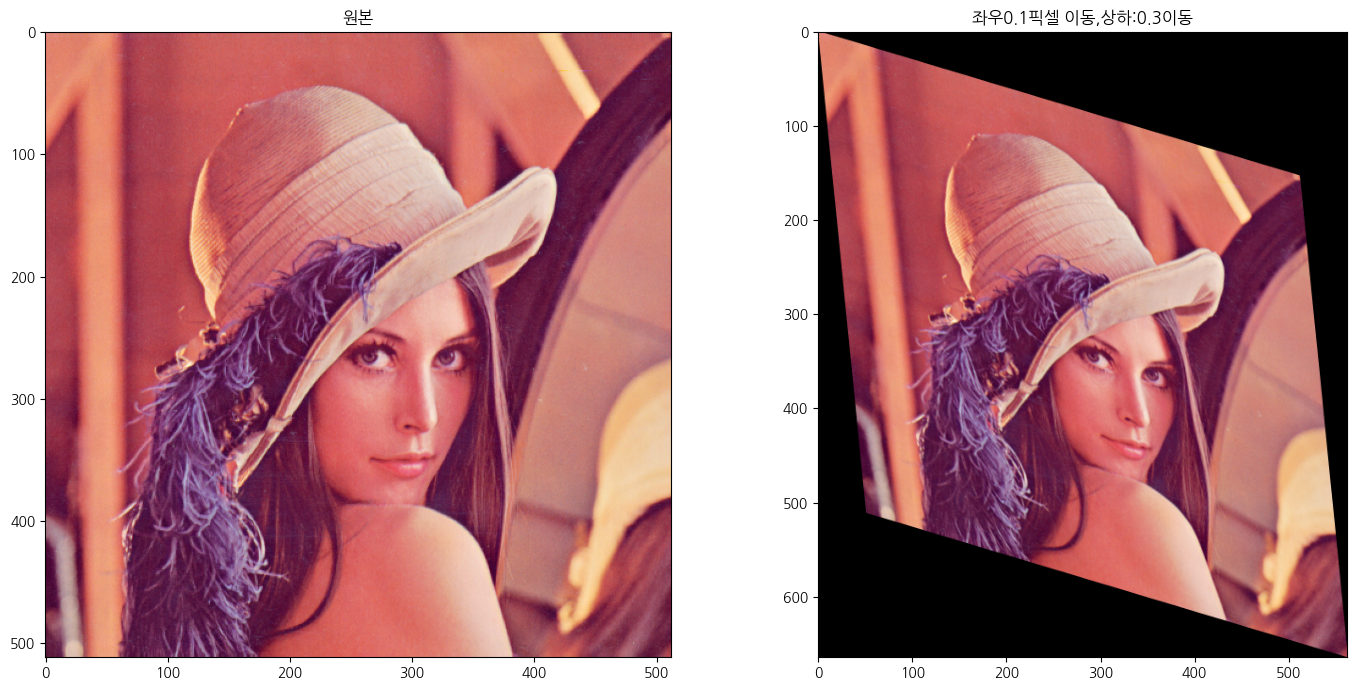

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.title('원본')

plt.subplot(1,2,2)
plt.imshow(result2[:,:,::-1])
plt.title(f'좌우{x_rate}픽셀 이동,상하:{y_rate}이동')
plt.tight_layout()
plt.show()


## 크기 조절(확대/축소 - Resize)
- cv2.resize(src, dsize\[, fx, fy, interpolation\])
    - 매개변수
        - src: 원본 이미지 
        - dsize: 조절할 이미지 크기 (width, height)
        - fx, fy: 상대적 크기로 지정한다. (dsize는 0,0 으로 설정한다. dsize를 설정하면 dsize가 우선한다.)
        - interpolation: 보간 방법
             - 크기를 조절할 때 본래는 없는 값을 메우는 작업이 필요한데, 이를 interpolation(보간법)이라고 한다.
    - 반환값
        - ndarray: resize된 이미지반환
        
### Interpolation 상수
- cv2.INTER_NEAREST: 이웃보간법. nearest neighbor interpolation이라고도 하며, 주변 이웃 pixel값을 가져와 빈공간을 채운다. 가장 빠르지만 화질이 좋지 않다.
- cv2.INTER_LINEAR: 쌍 선형보간법.(2x2 이웃픽셀을 계산해서 만든다.) resize의 default 방식. 연산속도가 빠르고 화질도 좋아서 많이 사용된다.
- cv2.INTER_CUBIC - 바이큐빅 보간법.(4x4 이웃픽셀을 계산해서 만든다.)  INTER_LINEAR보다 화질이 좋고 lancozs보다 계산량이 적어 많이 사용된다.
- cv2.LANCZOS4 - Lanczos보간법.(8x8 이웃픽셀을 계산해서 만든다.) 가장 부드럽게 값을 메우지만 연산이 많이 필요하다.
- cv2.INTER_AREA: 영역보간법. 크기를 **축소**할 때 많이 사용한다. 확대할 때는 nearest neighbor와 유사하다.
- 일반적으로 쌍 선형보간법(INTER_LINEAR)을 많이 쓴다.
    - 이미지 확대: 바이큐빅, 쌍 선형 보간법을 가장 많이 사용
    - 이미지 축소: 영역 보간법을 많이 사용.
    
### Interpolation 비교
- **upsampling**
    - nearest와 area는 계단현상이 발생
    - linear는 edge가 smooth된 효과가 발생
    - cubic과 lancozs는 edge가 shapen되는 효과
- **downsampling**
    - area는 pixel 관계에 따라 resampling하기 때문에 상대적으로 부드럽게 변환된다.
    - 나머지는 계단현상이 많이 발생한다.

In [1]:
import cv2
img=cv2.imread('images/pan.jpg')

In [47]:
# 절반 축소
# 두배 늘리기
h,w, _ =img.shape
small_size= int(w*0.5), int(h*0.5)
big_size= int(w*2), int(h*2)
small_size, big_size # width, height

((425, 281), (1700, 1126))

In [48]:
result_small = cv2.resize(img, # 대상이미지
                         dsize= small_size, # resize 할 크기 (w,h)
                        interpolation= cv2.INTER_AREA #보간 법 - 축소 INTER)AREA
                         )

In [49]:
result_big1 = cv2.resize(img, # 대상이미지
                         dsize= small_size, # resize 할 크기 (w,h)
                        interpolation= cv2.INTER_NEAREST #보간 법 - 축소 INTER)AREA
                         )
result_big2 = cv2.resize(img, # 대상이미지
                         dsize= small_size, # resize 할 크기 (w,h)
                        interpolation= cv2.INTER_LINEAR #보간 법 - 축소 INTER)AREA
                         )
result_big3 = cv2.resize(img, # 대상이미지
                         dsize= small_size, # resize 할 크기 (w,h)
                        interpolation= cv2.INTER_CUBIC #보간 법 - 축소 INTER)AREA
                         )
result_big4 = cv2.resize(img, # 대상이미지
                         dsize= small_size, # resize 할 크기 (w,h)
                        interpolation= cv2.INTER_LANCZOS4 #보간 법 - 축소 INTER)AREA
                         )

In [50]:
cv2.imshow('small',result_small)
cv2.imshow('nearest',result_big1)
cv2.imshow('linear',result_big2)
cv2.imshow('cubic',result_big3)
cv2.imshow('lanczos4',result_big4)
cv2.waitKey()
cv2.destroyAllWindows()

In [51]:
r= cv2.resize(img,dsize=(0,0), # fx,fy를 이용해서 resize 크기를 지정할 경우 (0,0)
              fx= 1.2, # width 의 resize의 비율
              fy= 2.2, # height 의 resize의 비율
              interpolation= cv2.INTER_LINEAR
             )
cv2.imshow('r',r)
cv2.waitKey()
cv2.destroyAllWindows()

### 대칭변환(Flip)
- cv2.flip(src, flipCode)
- 매개변수
    - src: 원본소스
    - flipCode: 대칭방향지정
        - 양수: 좌우대칭
        - 0: 상하대칭
        - 음수: 좌우/상하 대칭


In [52]:
img =cv2.imread('images/pan.jpg')
r1= cv2.flip(img,1) # 좌우
r2 = cv2.flip(img, 0) # 상하
r3 = cv2.flip(img, -1) # 좌우/상하
cv2.imshow('ori',img)
cv2.imshow('1',r1)
cv2.imshow('0',r2)
cv2.imshow('-1',r3)
cv2.waitKey()
cv2.destroyAllWindows()

## 회전(Rotate)
- cv.rotate(src, rotateCode): img
    - 매개변수
        - src: 회전시킬 원본이미지
        - rotateCode: 회전각도 상수
            - **ROTATE_90_CLOCKWISE**: 시계방향 90도
            - **ROTATE_180**: 180도 회전
            - **ROTATE_90_COUNTERCLOCKWISE**: 반시계방향 90도(시계방향 270도)
- 원하는 각도만큼 회전.
    - 얼마나 회전할지 getRotationMatrix2D()를 이용해 어파인 변환 행렬을 생성.
    - **warpAffine()**을 이용해 회전 처리
    - **getRotationMatrix2D(center, angle, scale)**
        - 2x3 회전을 위한 어파인 변환 행렬 생성
        - center: 회전의 중심점 좌표, 튜플형태로 지정
        - angle: 중심점을 기준으로 회전할 각도(양수: 반시계방향, 음수: 시계방향)
        - scale: 이미지 확대 및 축소 비율
    - **warpAffine(src, M, dsize)**
        - 회전 처리
        - src: 회전시킬 대상 이미지 배열.
        - M:  getRotationMatrix2D()가 반환한 어파인 변환 행렬을 사용
        - dsize: 출력이미지 크기        

In [2]:
# 90도 단위로 회전
img = cv2.imread('images/pan.jpg')
r_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
r_180 = cv2.rotate(img, cv2.ROTATE_180)
r_270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

cv2.imshow('ori',img)
cv2.imshow('90',r_90)
cv2.imshow('180',r_180)
cv2.imshow('270',r_270)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
# 원하는 각도 만큼 회전 -> affine 변환 행렬을 생성 -> warpAffine()을 이용해서 픽셀들의 위치를 지정 

angle= 20 # 회전할 각도 
h,w = img.shape[:2]
center_coor= int(w/2), int(h/2) # 이미지 중심정의 좌표(x,y)
aff_matrix= cv2.getRotationMatrix2D((0,0),#center_coor,# 회전축
                                   angle,
                                   1 # 회전 처리후 결과 이미지 크기 비율
                                   )
aff_matrix

array([[ 0.93969262,  0.34202014,  0.        ],
       [-0.34202014,  0.93969262,  0.        ]])

In [8]:
result= cv2.warpAffine(img,aff_matrix,(0,0))
cv2.imshow('ori',img)
cv2.imshow(f'{angle}',result)
cv2.waitKey()
cv2.destroyAllWindows()